# Deep Reinforcement learning for the "Dollar Game" environment

In [2]:
# import the Graph which is the base for our environment
import networkx as nx
from Graph import DGGraph, generate_game
from Graph import load_game

# import the classes for ML
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Flatten
# from tensorflow.keras.optimizers import Adam

# utils
import numpy as np
from matplotlib import pyplot as plt

## Problem setup

### Environment
A graph (DGGraph object) representing a given game. The graph has nodes (with integer values assigned to them) and edges.\
The state is a dictionary {node: node[value] for each node in graph}. 

### Objective
Win the game by making debt (sum of all negative values) non-negative in as few moves as possible (avoid inverse actions; namely, both give and take actions on the same node)

### Action space
On each node, two actions can be taken: 'give' and 'take'.\
'Give' action increases value of the node's neighbors by 1 and subtracts len(neighbors) from its own value.
'Take' action does the complete opposite.\
Thus, $A = \left\{(\text{node},\;\text{give_or_take}): \text{node}\in\text{nodes}, \;\text{give_or_take}\in[\text{give}, \;\text{take}]\right\}$

### Reward function
IDK lol. Probably, something to do with debt (and/or the number of negative values)

## Graph visualization

In [3]:
def print_graph(G):
    for n in G.nodes:
        print(n, G.nodes[n])

In [4]:
def scale_down_positions(pos):
    x, y = pos
    return (x - 160)/640 - 0.5, 1 - y/600 - 0.5

def draw_graph(G, transform=False, savefig=''):
    pos = {node: scale_down_positions(node_data['pos']) if transform else node_data['pos'] \
        for node, node_data in G.nodes.items()}
    fig, ax = plt.subplots(figsize=(7, 7))
    for node, node_data in G.nodes.items():
        plt.text(pos[node][0] + 0.02, pos[node][1] + 0.02, str(node_data['val']), fontsize=14)
        # TODO: fix the shift of values' labels
    nx.draw_networkx(G, pos=pos, ax=ax, node_size=250)
    if savefig:
        fig.savefig(f'others/{savefig}')

In [5]:
G = load_game('35.json')

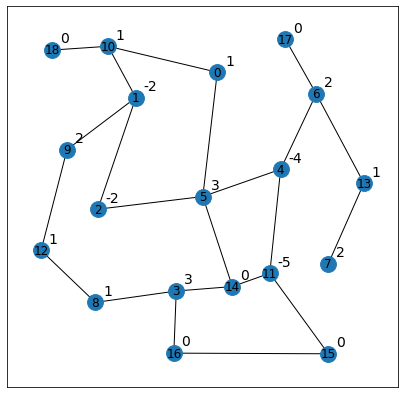

In [6]:
draw_graph(G, transform=True, savefig='')

# Random connected graph

In [7]:
G_rand = generate_game(number_of_nodes=10, bank_minus_genus=1)

In [8]:
print_graph(G_rand)

0 {'val': -2, 'pos': [210.0, 50.0]}
1 {'val': 4, 'pos': [514.0, 550.0]}
2 {'val': 2, 'pos': [716.0, 121.0]}
3 {'val': 0, 'pos': [548.0, 479.0]}
4 {'val': 2, 'pos': [311.0, 264.0]}
5 {'val': 2, 'pos': [750.0, 50.0]}
6 {'val': 2, 'pos': [345.0, 193.0]}
7 {'val': -2, 'pos': [412.0, 264.0]}
8 {'val': -1, 'pos': [480.0, 407.0]}
9 {'val': 0, 'pos': [480.0, 336.0]}


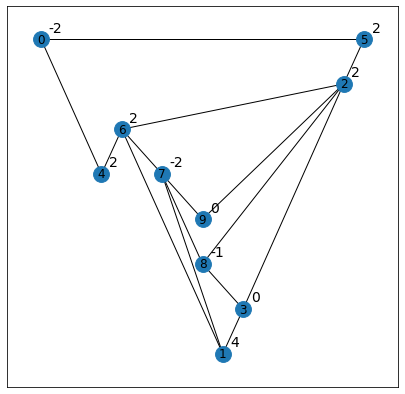

In [9]:
draw_graph(G_rand, transform=True)

In [21]:
from utils import save_new_game
save_new_game(G_rand)

New file 49.json created


'49.json'

In [10]:
def random_list_of_values1(n, bank=0):
    # TODO: generate a list of n integers totalling to bank (fix this!)
    while True:
        a = np.random.randint(-4, 5, n)
        if sum(a) == bank and sum(a < 0):
            return a.tolist()

In [61]:
def random_list_of_values2(n, bank=0):
    # this one is 10 times as fast as v1
    a = np.random.randint(-3, 4, n)
    diff = sum(a) - bank
    shifts = (2, 1) if diff > 0 else (-2, -1)
    for _ in range(abs(diff)):
        inds = np.random.choice(np.arange(len(a)), 2)
        a[inds[0]] -= shifts[0]
        a[inds[1]] += shifts[1]
    return a

In [63]:
from time import perf_counter

In [67]:
t0 = perf_counter()
for i in range(100):
    a = random_list_of_values1(500)
t1 = perf_counter()
print(t1 - t0)

1.0906838999999309
